Part 1

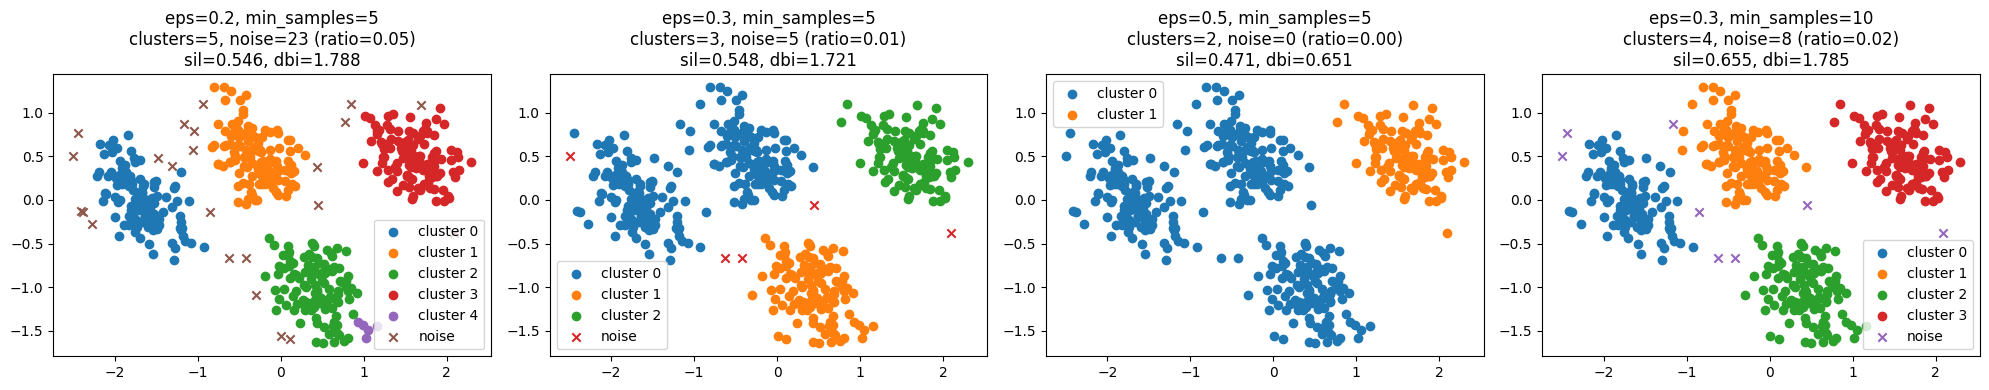

'\nConclusion: Increasing eps reduces noise but may merge clusters; increasing min_samples increases noise and removes small clusters.\n'

In [2]:
# Add libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 2. Prepare Data (Synthetic Example)
# make_blobs (well-separated clusters)
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Step 3. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4. Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_scaled)

# Step 5. Run DBSCAN with Different Parameters
params = [
{'eps': 0.2, 'min_samples': 5},
{'eps': 0.3, 'min_samples': 5},
{'eps': 0.5, 'min_samples': 5},
{'eps': 0.3, 'min_samples': 10},
]
results = []
for p in params:
    db = DBSCAN(eps=p['eps'], min_samples=p['min_samples'])
    labels = db.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    noise_ratio = n_noise / len(labels)
    sil = silhouette_score(X_scaled, labels) if n_clusters > 1 else np.nan
    dbi = davies_bouldin_score(X_scaled, labels) if n_clusters > 1 else np.nan
    results.append({
        'params': p,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'noise_ratio': noise_ratio,
        'silhouette': sil,
        'dbi': dbi,
        'labels': labels})

# Step 6. Visualization
fig, axes = plt.subplots(1, len(results), figsize=(5*len(results),4))
for ax, res in zip(axes, results):
    labels = res['labels']
    unique_labels = set(labels)
    for k in unique_labels:
        class_member_mask = (labels == k)
        xy = X_vis[class_member_mask]
        if k == -1:
            ax.scatter(xy[:,0], xy[:,1], marker='x', label='noise')
        else:
            ax.scatter(xy[:,0], xy[:,1], label=f'cluster {k}')
    ax.set_title(f"eps={res['params']['eps']}, min_samples={res['params']['min_samples']}\n"
                 f"clusters={res['n_clusters']}, noise={res['n_noise']} "
                 f"(ratio={res['noise_ratio']:.2f})\n"
                 f"sil={res['silhouette']:.3f}, dbi={res['dbi']:.3f}")
    ax.legend()
plt.tight_layout()
plt.show()


# Step 7. Drawing conclusions
# Conclusion: Increasing eps reduces noise but may merge clusters; increasing min_samples increases noise and removes small clusters.

Exercises

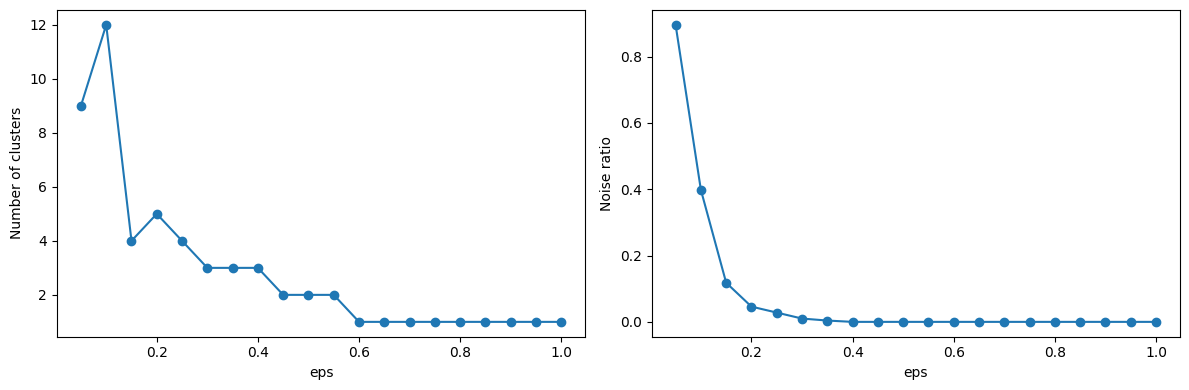

In [6]:
# Exercise 1
eps_values = np.arange(0.05, 1.01, 0.05)

n_clusters_list = []
noise_ratio_list = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = np.sum(labels == -1)
    noise_ratio = n_noise / len(labels)

    n_clusters_list.append(n_clusters)
    noise_ratio_list.append(noise_ratio)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(eps_values, n_clusters_list, marker='o')
plt.xlabel("eps")
plt.ylabel("Number of clusters")

plt.subplot(1,2,2)
plt.plot(eps_values, noise_ratio_list, marker='o')
plt.xlabel("eps")
plt.ylabel("Noise ratio")

plt.tight_layout()
plt.show()

# Small eps causes many points classified as noise
# Increasing eps reduces noise and increases cluster size
# Very large eps merges clusters into one
# Optimal eps balances low noise and stable cluster count



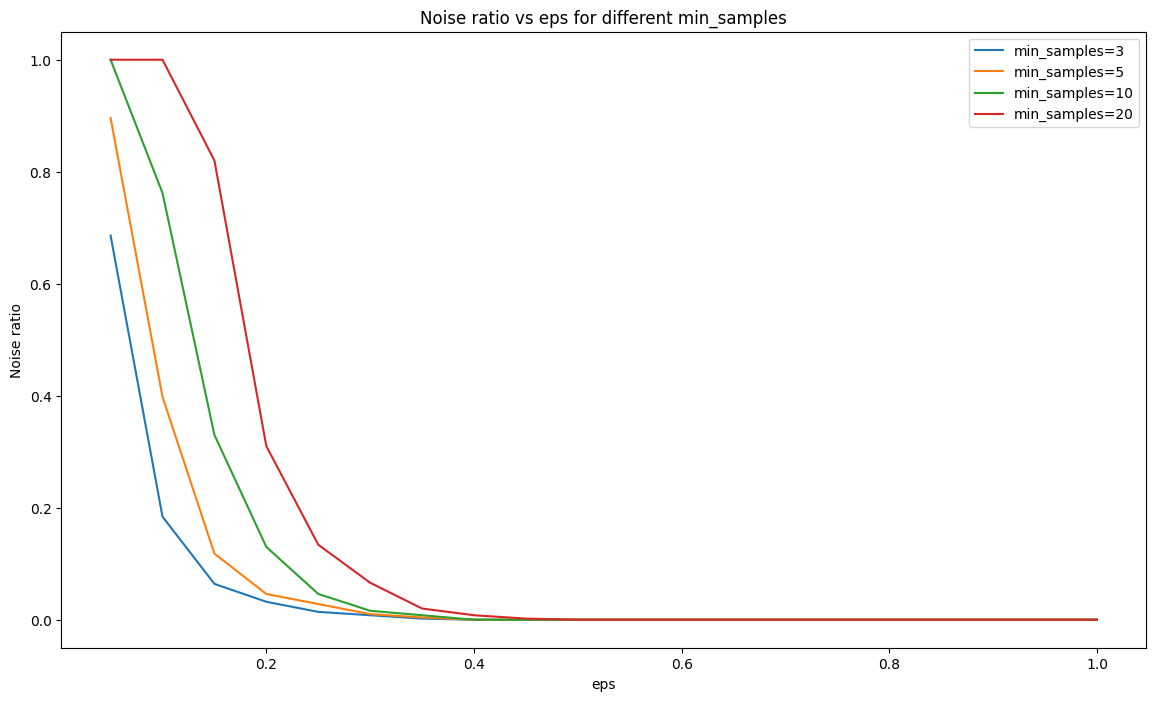

In [7]:
# Exercise 2
min_samples_values = [3, 5, 10, 20]
eps_values = np.arange(0.05, 1.01, 0.05)

plt.figure(figsize=(14,8))

for min_s in min_samples_values:
    n_clusters_list = []
    noise_ratio_list = []

    for eps in eps_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(X_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = np.sum(labels == -1)
        noise_ratio = n_noise / len(labels)

        n_clusters_list.append(n_clusters)
        noise_ratio_list.append(noise_ratio)

    plt.plot(eps_values, noise_ratio_list, label=f"min_samples={min_s}")

plt.xlabel("eps")
plt.ylabel("Noise ratio")
plt.legend()
plt.title("Noise ratio vs eps for different min_samples")
plt.show()

# Smaller min_samples are easier to form clusters and cause less noise
# Larger min_samples make a stricter density requirement
# High min_samples increases noise and removes small clusters
# DBSCAN becomes more conservative as min_samples increases

In [8]:
# Exercise 3
from sklearn.cluster import KMeans

# DBSCAN (best eps chosen empirically, e.g. 0.3)
dbscan = DBSCAN(eps=0.3, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

db_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
db_sil = silhouette_score(X_scaled, db_labels)

# KMeans (number of clusters from y_true)
kmeans = KMeans(n_clusters=len(set(y_true)), random_state=0)
km_labels = kmeans.fit_predict(X_scaled)
km_sil = silhouette_score(X_scaled, km_labels)

print("DBSCAN:")
print("Clusters:", db_clusters)
print("Silhouette:", db_sil)

print("\nKMeans:")
print("Clusters:", len(set(km_labels)))
print("Silhouette:", km_sil)

# Conclusion
# DBSCAN is better for noisy data
# KMeans is simpler and more stable for well-separated clusters

DBSCAN:
Clusters: 3
Silhouette: 0.5483309775169044

KMeans:
Clusters: 4
Silhouette: 0.6625579014869863


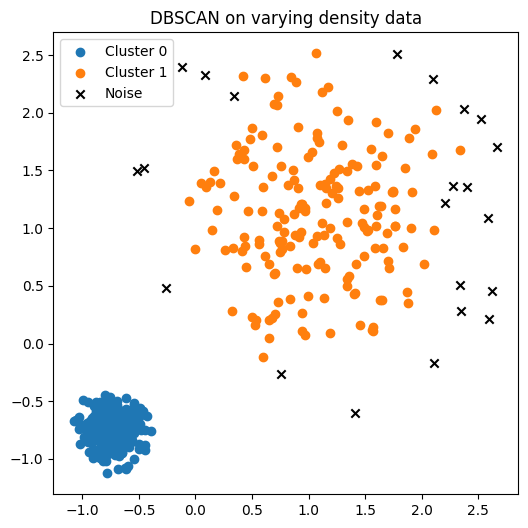

In [9]:
# Exercise 4
from sklearn.datasets import make_blobs

# Dense cluster
X_dense, _ = make_blobs(
    n_samples=300, centers=[(0, 0)], cluster_std=0.2, random_state=0
)

# Sparse cluster
X_sparse, _ = make_blobs(
    n_samples=200, centers=[(3, 3)], cluster_std=1.0, random_state=0
)

X_var = np.vstack([X_dense, X_sparse])
X_var = StandardScaler().fit_transform(X_var)

db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X_var)

plt.figure(figsize=(6,6))
for k in set(labels):
    mask = labels == k
    if k == -1:
        plt.scatter(X_var[mask,0], X_var[mask,1], c='black', marker='x', label='Noise')
    else:
        plt.scatter(X_var[mask,0], X_var[mask,1], label=f'Cluster {k}')

plt.legend()
plt.title("DBSCAN on varying density data")
plt.show()


# Explanation of the results
# DBSCAN correctly detects the dense cluster
# Sparse cluster is partially or fully classified as noise
# Shows DBSCAN’s limitation with varying densities
# Single eps value cannot handle all densities equally

Part 2

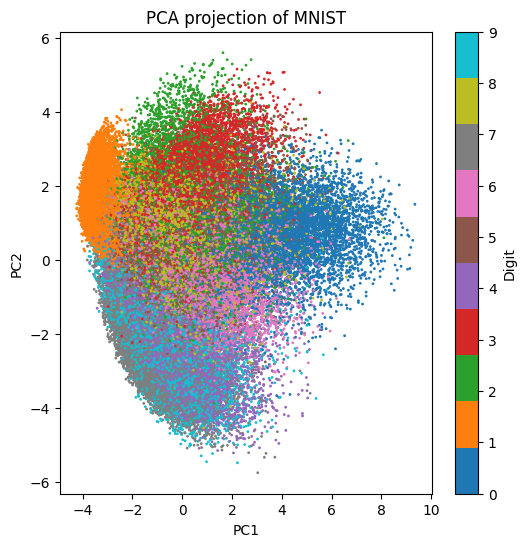

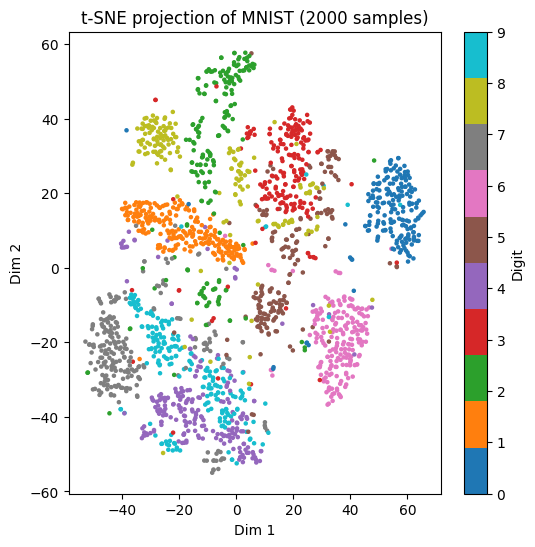

In [10]:
# Part 2
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

# Load MNIST
X_mnist, y_mnist = fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True,
    as_frame=False
)

# Normalize pixel values
X_mnist = X_mnist / 255.0
y_mnist = y_mnist.astype(int)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mnist)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_mnist, s=1, cmap='tab10')
plt.title("PCA projection of MNIST")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Digit")
plt.show()


# t-SNE
X_subset = X_mnist[:2000]
y_subset = y_mnist[:2000]

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42
)

X_tsne = tsne.fit_transform(X_subset)

plt.figure(figsize=(6,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, s=5, cmap='tab10')
plt.title("t-SNE projection of MNIST (2000 samples)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar(label="Digit")
plt.show()

# PCA resutls explanation
# PCA leads to the clusters that overlap each other, which makes it harder
# to see the different digits clearly.
# It maintains the overall variance but is not good at showing
# complex non-linear structures in images.

# t-SNE results explanation
# t-SNE clearly separates most digits into well-defined clusters.
# And the local neighborhood structure is preserved, which makes it easier
# to see different digit groups.


Control Questions Answers

DBSCAN

1. What are eps and min_samples? How do they affect clustering?
- eps is the radius around a point and min_samples is the minimum number of points inside that radius.
- Larger eps means fewer clusters and less noise, while larger min_samples means fewer clusters and more noise.

2. Why can DBSCAN detect clusters of arbitrary shape unlike KMeans?
- DBSCAN groups points by density and not by distance to a center. Because of that clusters can have any shape.

3. What does the label -1 mean in scikit-learn DBSCAN output?
- It means that the point is noise and does not belong to any cluster.

4. In which tasks is DBSCAN not suitable? Why?
- It's not good for data with very different densities, because one eps value cannot fit all clusters.

5. How can you select eps in practice (heuristics)?
- You could use a k-distance plot and also try several eps values and check silhouette score and noise ratio


t-SNE

6. What is the main objective of the t-SNE algorithm?
- To visualize high-dimensional data by preserving local neighborhoods.

7. How does t-SNE model high-dimensional and low-dimensional similarities?
- High-dimensional: Gaussian probabilities
- Low-dimensional: Student t-distribution probabilities

8. What is the role of KL divergence in t-SNE?
- It measures the difference between high and low-dimensional distributions and is minimized during training.

9. How does the perplexity parameter affect the embedding?
- Low perplexity focuses on local structure, while high perplexity focuses more on global structure

10. Why can t-SNE produce different results each time it is run?
- Because it uses random initialization and non-convex optimization.


PCA

11. What is the mathematical goal of PCA?
- To find directions that maximize variance in the data.

12. How does PCA differ from t-SNE in preserving data structure?
- PCA preserves global structure, while t-SNE preserves local structure

13. Why is PCA faster and deterministic compared to t-SNE?
- PCA uses a closed-form linear solution, while t-SNE uses iterative optimization.

14. When might PCA be preferable to t-SNE?
- When speed, reproducibility, preprocessing are more important then choose PCA, but if visualization quality is more important the use t-SNE.

Comparison

15. Which method better preserves local structure? Global structure?
- PCA preserves global structure, while t-SNE preserves local structure

16. Which visualization is clearer for MNIST? Why?
- t-SNE, because it separates digit clusters more clearly.